# **Static experiments**


Static experiments - experiments when the robot is in a static configuration. The velocity and acceleration of the joints are zero.
In this experiment you can measure the following parameters:
- What torques the robot must maintain in different configurations to maintain a static position
- What is the robot's workspace (what configurations does the robot support given collisions and singularities)

The position, velocity and acceleration of the motors in MuJoCo can be specified via the attributes `mjData_.qpos`, `mjData_.qvel` and `mjData_.qacc` respectively.

The inverse dynamics can be solved using the `mujoco.mj_inverse` method, with the torque values stored in the `mjData_.qfrc_inverse` attribute. This attribute is the net force which calculates by:
$$
\tau = \tau_{app} + J_c^Tf + \tau_u
$$

The task related to data collection for static experiments was in the [previous lecture](https://colab.research.google.com/drive/1xpEQgbdFxv3QrRD5bocB3T1Tmgsupjtf?usp=sharing).

# **Dynamic experiments**


Dynamic experiments - experiments that are conducted along a trajectory, respectively the velocity and acceleration of the motor is non-zero.

## **Linear trajectory**
A linear trajectory in Euclidean space can be given by a weighted function whose values will be distributed from 0 to 1 in the time interval from 0 to $T$.

Then the real robot position can be set by:
$$
X(t) = X_{start} + s(t)(X_{end} - X_{start})
$$

The velocity and acceleration in this case will be:
$$
\dot{X}(t) = \dot{s}(t)(X_{end} - X_{start}); \quad \ddot{X}(t) = \ddot{s}(t)(X_{end} - X_{start})
$$

There are different methods of giving this weighted function, one popular and reliable method is the polynomial. It is best to use a polynomial of degree 5, as this polynomial can be used to set constraints on the start and end of the trajectory.

$$
s(t) = a_0 + a_1t + a_2t^2 + a_3t^3 + a_4t^4 + a_5t^5
$$

According to the weighted function the velocity and acceleration of weighted function will be following:
$$
\dot{s}(t) = a_1 + 2a_2t + 3a_3t^2 + 4a_4t^3 + 5a_5t^4
$$
$$
\ddot{s}(t) = 2a_2 + 6a_3t + 12a_4t^2 + 20a_5t^3
$$

Assume that $s(0)=0$, $s(T)=1$, $\dot{s}(0)=0$, $\dot{s}(T)=0$, $\ddot{s}(0)=0$, $\dot{s}(T)=0$ we can get following parameters:
$$
a_0 = a_1 = a_2 = 0; \quad a_3=\frac{10}{T^3};\quad a_4 = -\frac{15}{T^4}; \quad a_5=\frac{6}{T^5}
$$

If you have have limitation on velocity in Cartesian space you can use following formula for $T$, to achieve the maximum velocity on the middle on trajectory:
$$
T = \frac{15}{8}\frac{\sqrt{(X_{end} - X_{start})^T(X_{end} - X_{start})}}{v_{max}}
$$


## **Inverse kinematics**
The general solution for inverse kinematics you can perform via solving nonlinear optimization problem:

\begin{equation}
\begin{array}{rrclcl}
\displaystyle \min_{q} & {(X(t) - FK(q))^T(X(t) - FK(q))}
\end{array}
\end{equation}

In the MuJoCo realized minimize tool. The tutorial of inverse kinematics for avalible [here](https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/least_squares.ipynb#scrollTo=nqqtSIkGe-ay)

## **Inverse velocity and acceleration**


To find velocity in cartesian space we use the mapping based on robot jacobian. In this cas we will do the same, but inverse task:
$$
\dot{q}(t) = J^+(q)\dot{X}(t)
$$
The same thing with acceleration:
$$
\ddot{q}(t) = J^+(q)\cdot(\ddot{X}(t) - \frac{dJ(q)}{dt}\cdot\dot{q}(t))
$$

# **Task**
> Write a linear trajectory where the robot performs a cross. The amplitude of the cross is 4 cm, the maximum velocity is 0.4 m/s. Visualize the trajectory in the simulator and collect data on the position, velocity and acceleration of the robot in joint space and cartesian space, as well as torques in the robot's motors during the trajectory. Save the collected data to a .csv file. Select the initial position of the robot yourself, so that it covers the entire desired trajectory.

> Plot a trajectory. In particular, plot position, velocity, acceleration and torque against time. It is better if you format these graphs as subplots with sharex.

> Record a video visualization of your trajectory using mujoco viewer.

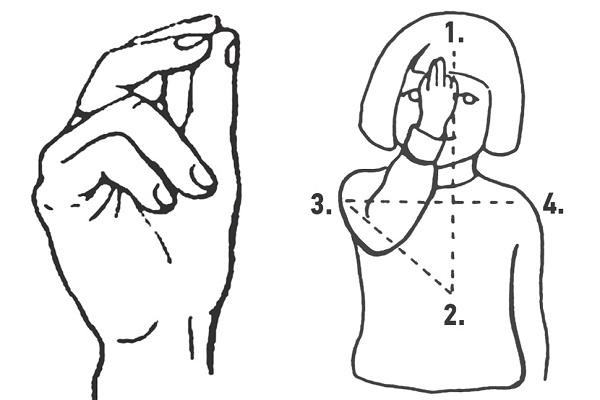